## Jupyter notebook for ploting supplementary Fig. 3b
This notebook is the code for ploting supplementary Fig. 3b in the paper **"Simultaneous analysis of open chromatin, promoter interactions and gene expression in stimulated T cells implicates causal genes for rheumatoid arthritis"** by Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre.

Author : *Jing Yang*  <br />
Date: 24-10-2019 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### loading required packages

In [1]:
library(ggplot2)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)
library(ChIPseeker)

Loading required package: GenomicFeatures

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: st

### read the raw reads ATACseq data

In [2]:
data <- read.table('data/ATACseq_rawreads_withreplicates.csv', header=T,sep=",")

### save the peak information to a file called 'peak_file.txt'

In [3]:
write.table(data[,1:3],file='data/peak_file.txt',quote=F, row.names=F,sep='\t')


### annotate the peaks and use piechart to show the results. TSS region is definied [-500,1000] bp up and dowstream from TSS 

>> loading peak file...				 2019-10-28 18:31:39 
>> preparing features information...		 2019-10-28 18:31:40 
>> identifying nearest features...		 2019-10-28 18:31:41 
>> calculating distance from peak to TSS...	 2019-10-28 18:31:44 
>> assigning genomic annotation...		 2019-10-28 18:31:44 
>> adding gene annotation...			 2019-10-28 18:32:17 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2019-10-28 18:32:18 
>> done...					 2019-10-28 18:32:18 


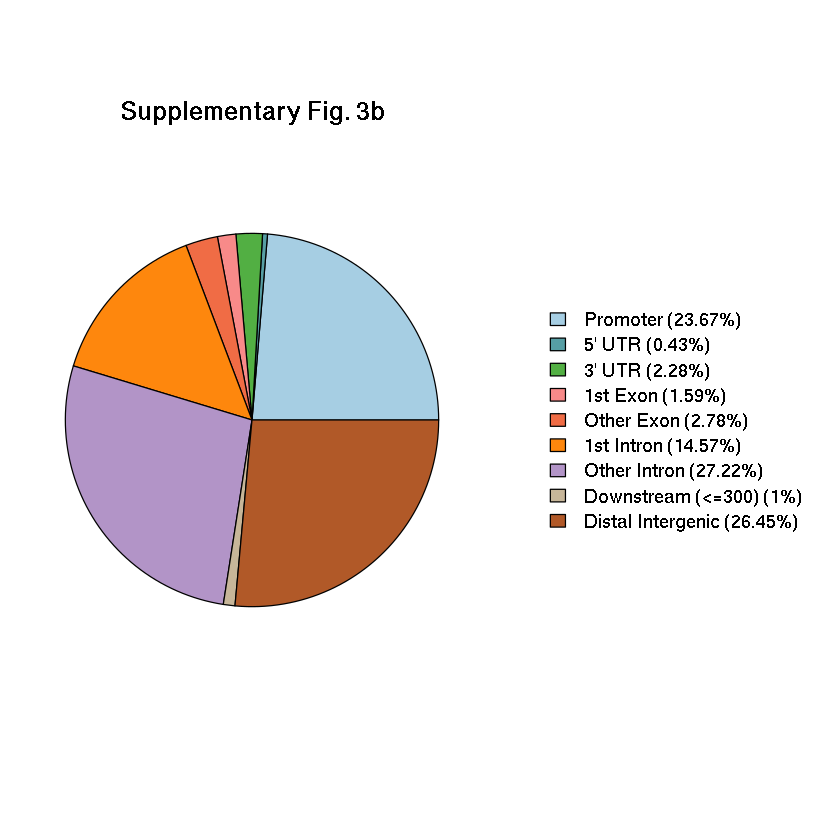

In [4]:
txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene
peakAnno_own <- annotatePeak('data/peak_file.txt', tssRegion=c(-500, 1000), TxDb=txdb, annoDb="org.Hs.eg.db")
plotAnnoPie(peakAnno_own,cex=0.5,main='Supplementary Fig. 3b', line=-5)